# Imports

In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

%matplotlib inline

# Generate data

In [2]:
xs = np.array(range(10, 200, 20))
ys = np.array([0,0,0,0,1,0,1,0,1,1])

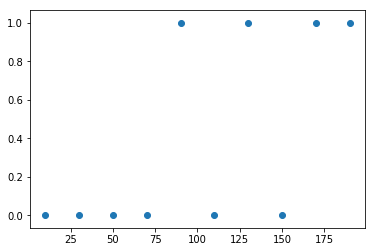

In [3]:
plt.scatter(xs, ys)
plt.show()

# Functions

In [4]:
def predict(xs, b1):
    return 1 / (1 + np.exp( -1 * xs * b1))

In [5]:
def loss(ys, phs):
    # negative log loss
    losses = (ys * np.log(phs)) + ((1 - ys) * np.log(1 - phs))
    return -1 * losses # [~np.isnan(losses) & ~np.isinf(losses)]

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
model = LogisticRegression().fit(xs.reshape(10,1), ys)

/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
model.coef_

array([[0.01007969]])

In [9]:
model.intercept_

array([-1.00497899])

In [10]:
model.predict_proba(xs.reshape(10,1))[:,1]

array([0.28819183, 0.33123861, 0.37730698, 0.42570398, 0.47556773,
       0.52592344, 0.57575732, 0.62409693, 0.6700847 , 0.7130333 ])

# Loss as function of $ \beta $

In [11]:
betas = list(range(-2,4))
predictions = np.array([predict(xs, b) for b in betas])
losses = np.array([loss(ys, predict(xs, b)) for b in betas])

/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
betas

[-2, -1, 0, 1, 2, 3]

/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1166: RuntimeWarning: invalid value encountered in double_scalars
  notch_min = med - 1.57 * iqr / np.sqrt(N)
/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


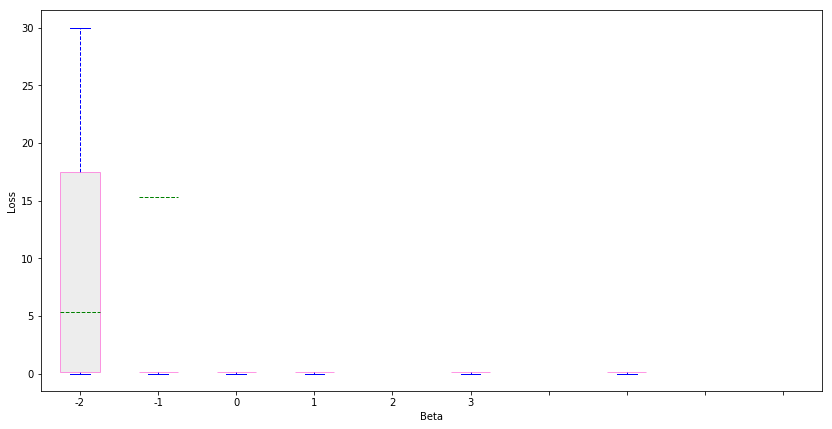

In [13]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(losses, patch_artist=True)
for box in bp['boxes']:
    box.set(color='#ff33cc', linewidth=1)
    box.set(facecolor='#dddddd', alpha=0.5)
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=1, linestyle='--')
for cap in bp['caps']:
    cap.set(color='blue', linewidth=1)
for median in bp['medians']:
    median.set(color='green', linewidth=1, linestyle='--')
for flier in bp['fliers']:
    flier.set(color='black', marker='*', alpha=0.7)
ax.set_xticklabels(betas)
ax.set_xlabel('Beta')
ax.set_ylabel('Loss')
plt.show()

In [14]:
predictions

array([[2.06115362e-009, 8.75651076e-027, 3.72007598e-044,
        1.58042006e-061, 6.71418429e-079, 2.85242334e-096,
        1.21181048e-113, 5.14820022e-131, 2.18713783e-148,
        9.29173632e-166],
       [4.53978687e-005, 9.35762297e-014, 1.92874985e-022,
        3.97544974e-031, 8.19401262e-040, 1.68891188e-048,
        3.48110684e-057, 7.17509597e-066, 1.47889751e-074,
        3.04823495e-083],
       [5.00000000e-001, 5.00000000e-001, 5.00000000e-001,
        5.00000000e-001, 5.00000000e-001, 5.00000000e-001,
        5.00000000e-001, 5.00000000e-001, 5.00000000e-001,
        5.00000000e-001],
       [9.99954602e-001, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000],
       [9.99999998e-001, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.0

In [15]:
losses

array([[ 2.06115358e-09, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  1.80000000e+02, -0.00000000e+00,
         2.60000000e+02, -0.00000000e+00,  3.40000000e+02,
         3.80000000e+02],
       [ 4.53988992e-05,  9.35918010e-14, -0.00000000e+00,
        -0.00000000e+00,  9.00000000e+01, -0.00000000e+00,
         1.30000000e+02, -0.00000000e+00,  1.70000000e+02,
         1.90000000e+02],
       [ 6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
         6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
         6.93147181e-01,  6.93147181e-01,  6.93147181e-01,
         6.93147181e-01],
       [ 1.00000454e+01,  3.00010206e+01,             inf,
                    inf,             nan,             inf,
                    nan,             inf,             nan,
                    nan],
       [ 2.00000000e+01,             inf,             inf,
                    inf,             nan,             inf,
                    nan,             inf,             nan,
           